# Visualisation of logs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data import and normalisation

In [1]:
import pandas as pd

logs_raw = pd.read_json('data/logs.json')
logs_raw.head()

,timestamp,action,httpRequest,host
0,211256,ALLOW,"{'clientIp': '172.6.20.69', 'country': 'PH', '...",www.f81C.de
1,248639,ALLOW,"{'clientIp': '13.181.79.103', 'country': 'PH',...",www.Ip8n.de
2,152940,ALLOW,"{'clientIp': '168.199.225.84', 'country': 'PH'...",www.WN9V.de
3,147516,ALLOW,"{'clientIp': '127.199.221.38', 'country': 'PH'...",www.J6Nj.de
4,149819,ALLOW,"{'clientIp': '34.77.119.65', 'country': 'PH', ...",www.NoE6.de


In [2]:
# Auflösen der 'data'-Spalte
normalized_logs_raw = pd.json_normalize(logs_raw['httpRequest'])

# Zusammenführen mit der ursprünglichen ID
logs = pd.concat([logs_raw, normalized_logs_raw], axis=1)
logs.drop(['httpRequest'], axis=1, inplace=True)
logs.head()

NameError: name 'logs_raw' is not defined

In [2]:
import pandas as pd
logs = pd.read_csv('data/logs.csv')
logs.head()

,timestamp,action,host,clientIp,country,uri
0,166932,ALLOW,www.Mfnk.de,64.254.162.196,DE,/placeholder
1,119215,ALLOW,www.Mfnk.de,64.254.162.196,DE,/placeholder
2,468247,ALLOW,www.Mfnk.de,64.254.162.196,DE,/placeholder
3,491385,ALLOW,www.Mfnk.de,64.254.162.196,DE,/placeholder
4,450193,ALLOW,www.Mfnk.de,64.254.162.196,DE,/placeholder


In [5]:
all_client_ips = logs['clientIp'].unique()
all_hosts = logs['host'].unique()

## Visualise (number of Requests / host) for on client ip

In [5]:
logs1 = logs.copy()
logs1 = logs1.groupby(['clientIp', 'host']).size().reset_index(name='count')

logs1

,clientIp,host,count
0,10.197.155.87,www.jYYu.de,390
1,10.203.254.95,www.jYYu.de,201
2,10.218.119.204,www.s5oG.de,423
3,10.242.124.251,www.vh4d.de,518
4,10.80.245.112,www.s5oG.de,897
...,...,...,...
2495,99.29.218.40,www.s5oG.de,740
2496,99.32.37.224,www.s5oG.de,260
2497,99.77.23.113,www.SR1p.de,327
2498,99.84.142.147,www.s5oG.de,781


### Example for one single clientIp

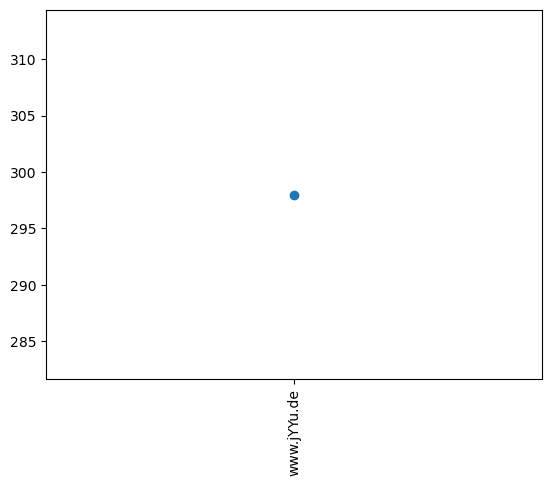

In [6]:
df1 = logs1[logs1['clientIp'] == all_client_ips[0]]

plt.scatter(df1['host'], df1['count'])

plt.xticks(rotation=90)
plt.show()

### Example for multiply clientIps

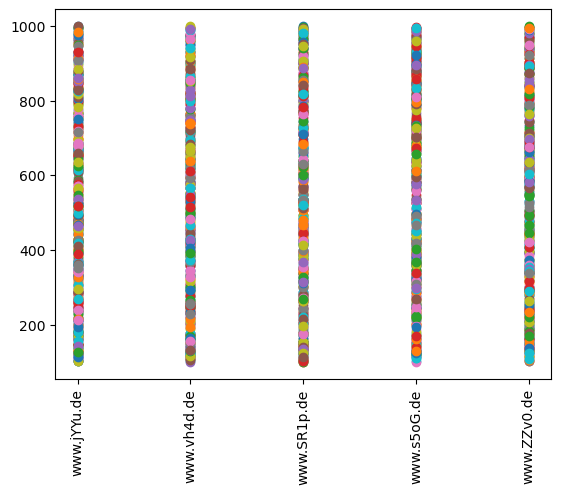

In [7]:
for client in all_client_ips:
    df2 = logs1[logs1['clientIp'] == client]
    plt.scatter(df2['host'], df2['count'], label=client)

plt.xticks(rotation=90)
#plt.legend()
plt.show()

## Visualise (number of Requests / clientIp) for on host

In [8]:
logs2 = logs.copy()
logs2 = logs2.groupby(['host', 'clientIp']).size().reset_index(name='count')

logs2

,host,clientIp,count
0,www.SR1p.de,100.11.228.143,104
1,www.SR1p.de,100.132.16.185,190
2,www.SR1p.de,102.53.51.10,606
3,www.SR1p.de,103.159.162.207,263
4,www.SR1p.de,103.163.152.220,594
...,...,...,...
2495,www.vh4d.de,97.28.28.195,528
2496,www.vh4d.de,98.156.133.102,101
2497,www.vh4d.de,98.156.239.71,235
2498,www.vh4d.de,99.241.191.182,363


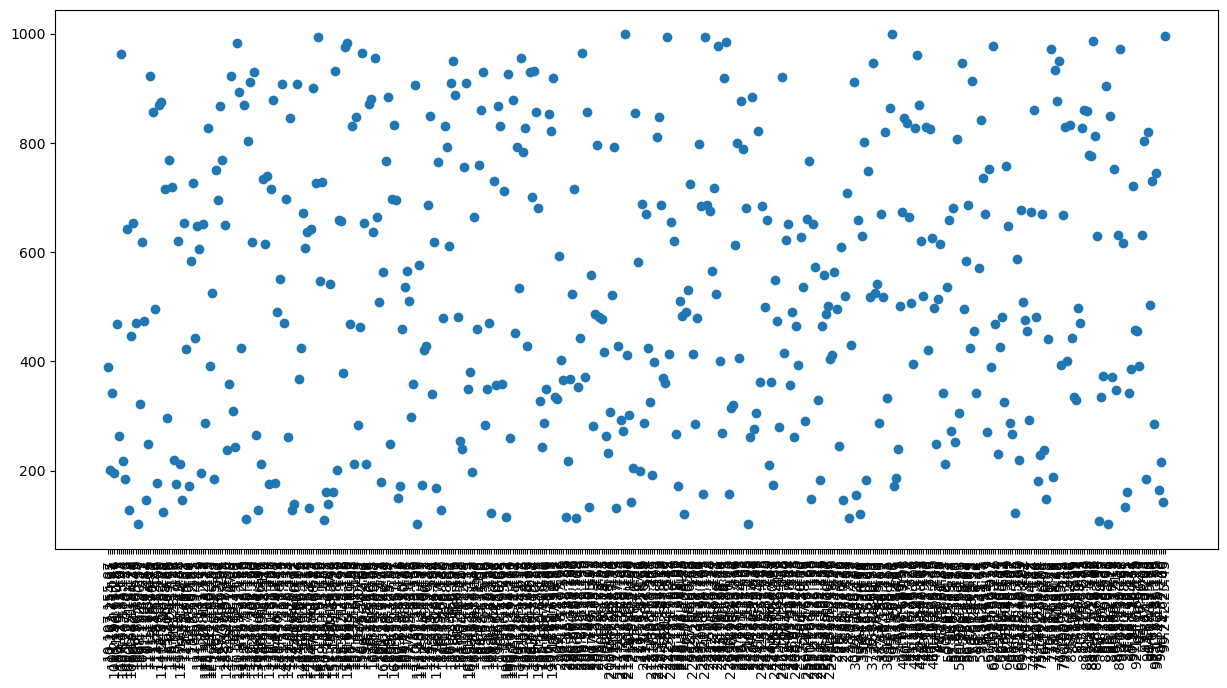

In [9]:
plt.figure(figsize=(15, 7))

df2 = logs2[logs2['host'] == all_hosts[0]]
plt.scatter(df2['clientIp'], df2['count'])

plt.xticks(rotation=90)
plt.show()

In [4]:
plt.figure(figsize=(15, 7))

for host in all_hosts:
    df2 = logs1[logs1['host'] == host]
    plt.scatter(df2['clientIp'], df2['count'], label=host)

plt.xticks(rotation=90)
#plt.legend()
plt.show()

NameError: name 'logs1' is not defined

<Figure size 1500x700 with 0 Axes>

## Feature selection

In [3]:
iteration_amount = 5

In [6]:
logs3 = logs.copy()
logs3 = logs3.sort_values(by=['host', 'clientIp', 'timestamp'])
#logs3 = logs3.groupby(['host', 'clientIp']).size().reset_index(name='count')

l3T = pd.DataFrame({
    'host': [],
    'clientIp': [],
    'timestamp_min': [],
    'timestamp_max': [],
    'time_active': [],
    'count': []
})

for host in all_hosts:
    logs3_hosts = logs3[logs3['host'] == host]
    
    for client in logs3_hosts['clientIp'].unique():
        logs3_host_client = logs3_hosts[logs3_hosts['clientIp'] == client]
        line = {
            'host': host,
            'clientIp': client,
            'timestamp_min': logs3_host_client['timestamp'].min(),
            'timestamp_max': logs3_host_client['timestamp'].max(),
            'time_active': logs3_host_client['timestamp'].max() - logs3_host_client['timestamp'].min(),
            'count': len(logs3_host_client)
        }
        l3T.loc[len(l3T)] = line
        
l3T


,host,clientIp,timestamp_min,timestamp_max,time_active,count
0,www.Mfnk.de,10.70.227.68,100484,699393,598909,869
1,www.Mfnk.de,10.81.144.239,100438,698685,598247,828
2,www.Mfnk.de,100.246.106.50,100279,694277,593998,833
3,www.Mfnk.de,100.56.180.55,100294,699315,599021,824
4,www.Mfnk.de,100.71.136.12,100113,698671,598558,858
...,...,...,...,...,...,...
2515,www.wx5A.de,97.36.83.108,100963,699940,598977,824
2516,www.wx5A.de,98.174.51.131,100250,699561,599311,1728
2517,www.wx5A.de,98.19.102.82,100030,698995,598965,848
2518,www.wx5A.de,98.238.230.230,101893,699026,597133,841


In [7]:
l3T.to_csv('data/l3T.csv', index=False)

In [8]:
print(l3T['time_active'].mean())

597023.7845238096


### rebuilt of (amount of requests / client) for hosts

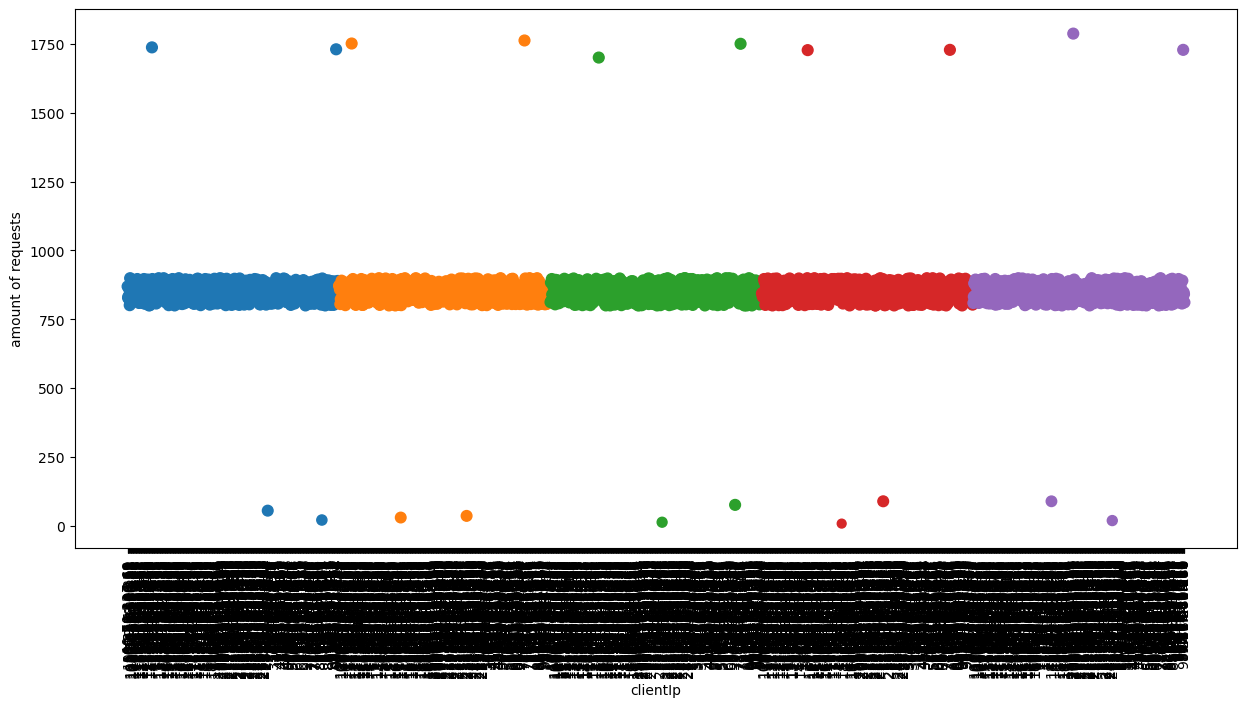

In [8]:
plt.figure(figsize=(15, 7))

iterator = 0
for host in all_hosts:
    df3 = l3T[l3T['host'] == host]
    plt.scatter(df3['clientIp'], df3['count'], label=host, s=df3['time_active']/10000)
    if iterator > iteration_amount:
        break
    iterator += 1

plt.xticks(rotation=90)
plt.ylabel('amount of requests')
plt.xlabel('clientIp')
#plt.legend()
plt.show()

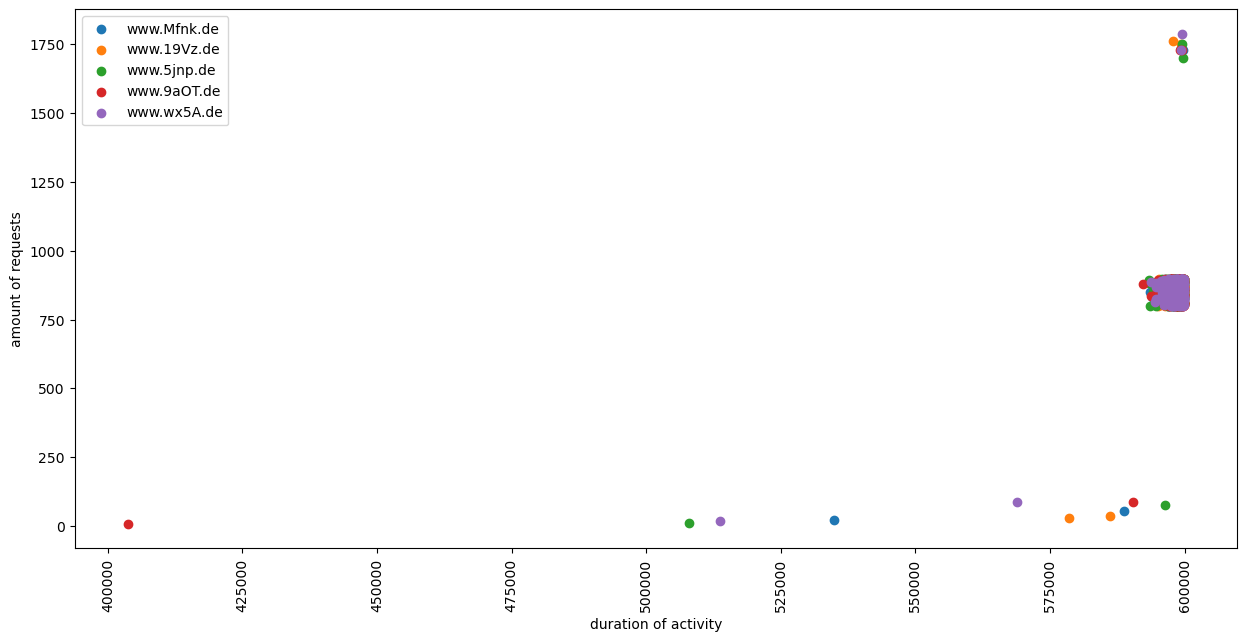

In [9]:
plt.figure(figsize=(15, 7))

iterator = 0
for host in all_hosts:
    df3 = l3T[l3T['host'] == host]
    plt.scatter(df3['time_active'], df3['count'], label=host)
    
    if iterator > iteration_amount:
        break
    iterator += 1

plt.xticks(rotation=90)
plt.ylabel('amount of requests')
plt.xlabel('duration of activity')
plt.legend()
plt.show()

### testing features

In [17]:
l3T.head()

,host,clientIp,timestamp_min,timestamp_max,time_active,count
0,www.XC6s.de,10.104.64.112,100000,700000,600000,754
1,www.XC6s.de,10.177.203.43,102091,700000,597909,598
2,www.XC6s.de,10.229.209.61,120513,675112,554599,715
3,www.XC6s.de,10.238.12.4,120090,682954,562864,551
4,www.XC6s.de,101.247.190.61,100000,700000,600000,619


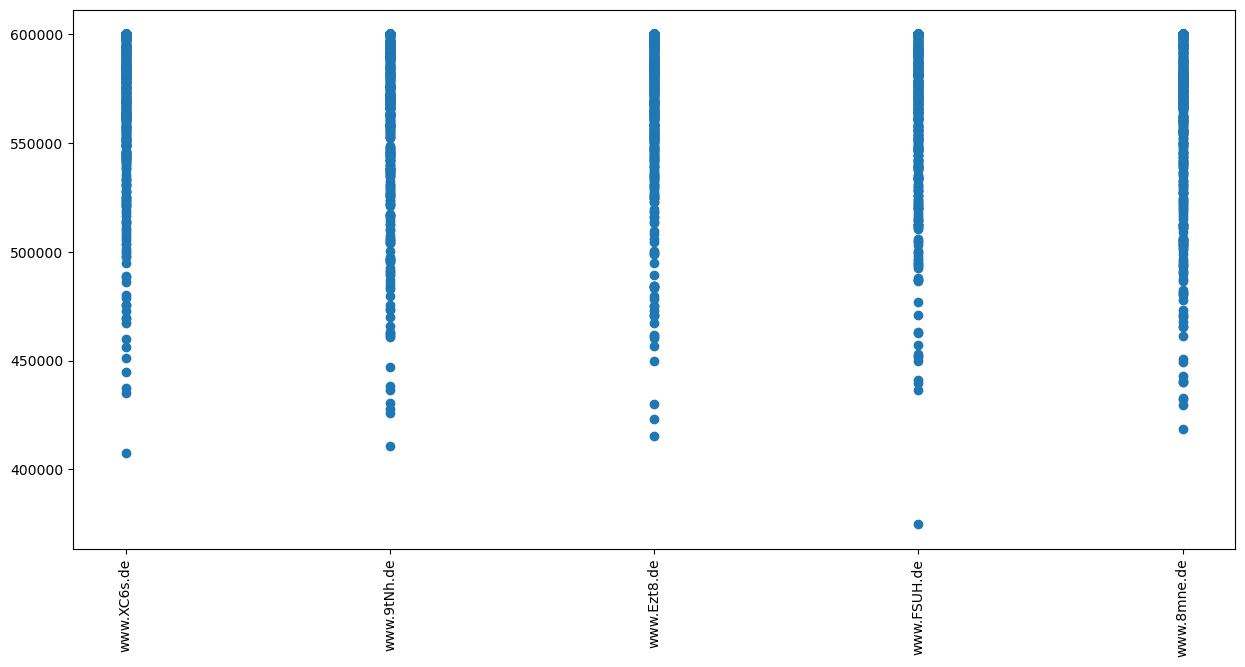

In [18]:
plt.figure(figsize=(15, 7))

plt.scatter(l3T['host'], l3T['time_active'])

plt.xticks(rotation=90)
#plt.axvline(x=10, color='black', linestyle='--')
plt.show()